- https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863#b465

In [23]:
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

In [25]:
def lr_step_values(scheduler):
    # Get learning rates as each training step
    learning_rates = []
    # EPOCHS*STEPS_IN_EPOCH：表示总的优化步（optimizer steps）
    for i in range(EPOCHS*STEPS_IN_EPOCH):
        optimizer.step()
        learning_rates.append(optimizer.param_groups[0]["lr"])
        scheduler.step()
    return learning_rates

In [30]:
def vis_lr_values(lr_values, title=''):
    # Visualize learinig rate scheduler
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.plot(range(EPOCHS*STEPS_IN_EPOCH), 
            lr_values,
            marker='o', 
            color='black')
    ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
    ax.set_ylim([0, LEARNING_RATE + 0.0001])
    ax.set_xlabel('Steps')
    ax.set_ylabel('Learning Rate')
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.show()

## StepLR

$$
\eta_t = \gamma \eta_{t-1}
$$

In [21]:
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = StepLR(optimizer, 
                   step_size = 4, # Period of learning rate decay
                   gamma = 0.5) # Multiplicative factor of learning rate decay
learning_rates_step = lr_values(scheduler)

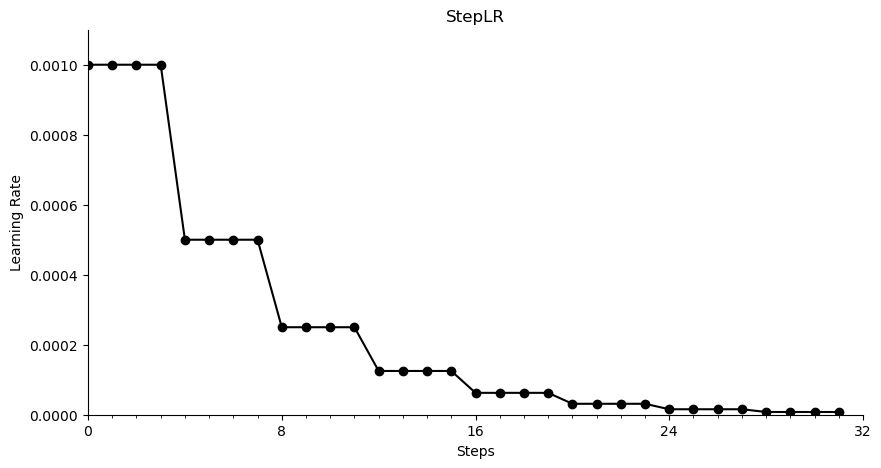

In [31]:
vis_lr_values(learning_rates_step, 'StepLR')

## ExponentialLR

$$
\eta_t = \gamma \eta_{t-1}
$$

- 与 StepLR 相比，没有稳定周期

In [24]:
from torch.optim.lr_scheduler import ExponentialLR
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.5)
lr_values_exp = lr_values(scheduler)

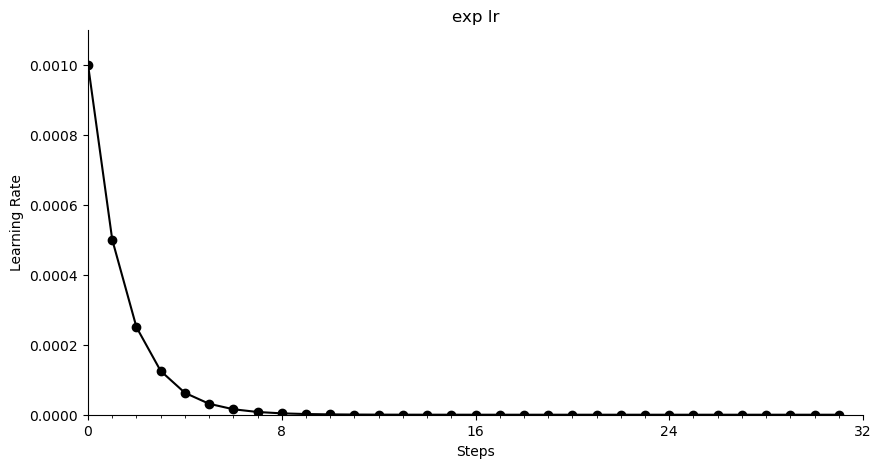

In [32]:
vis_lr_values(lr_values_exp, 'exp lr')

## ConstantLR

- factor 与 total_iters
    - 在初始的 total_iters 内，lr = lr * factor
    - 在 total_iters 之后，恢复到初始的 lr；

In [34]:
from torch.optim.lr_scheduler import ConstantLR
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = ConstantLR(optimizer, factor=0.5, total_iters=8)
lr_values_constant = lr_step_values(scheduler)

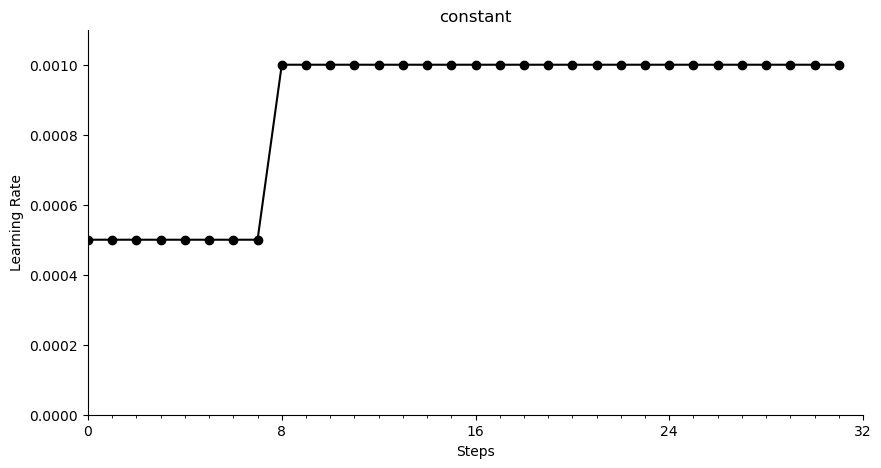

In [36]:
vis_lr_values(lr_values_constant, 'constant')

## LinearLR

In [42]:
from torch.optim.lr_scheduler import LinearLR
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = LinearLR(optimizer, start_factor=0.5, total_iters=16)
lr_values_linear = lr_step_values(scheduler)

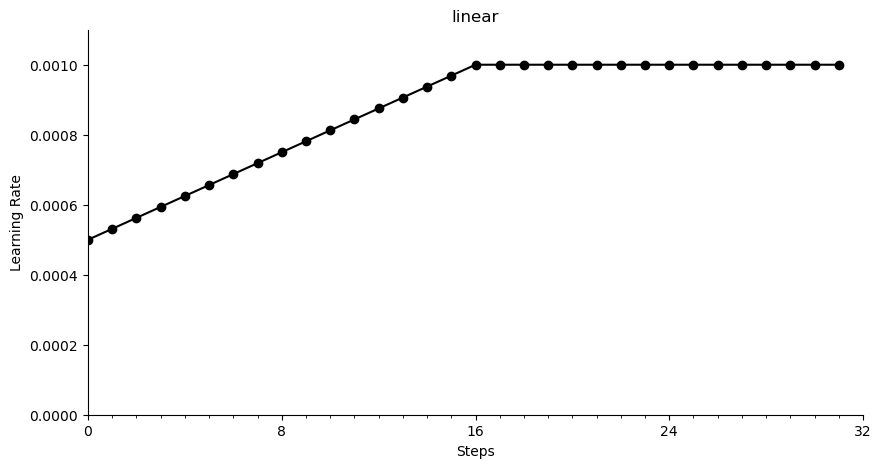

In [43]:
vis_lr_values(lr_values_linear, 'linear')

## Cosine LR

In [46]:
from torch.optim.lr_scheduler import CosineAnnealingLR
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = CosineAnnealingLR(optimizer, T_max=16, eta_min=1e-4)
lr_values_cos = lr_step_values(scheduler)

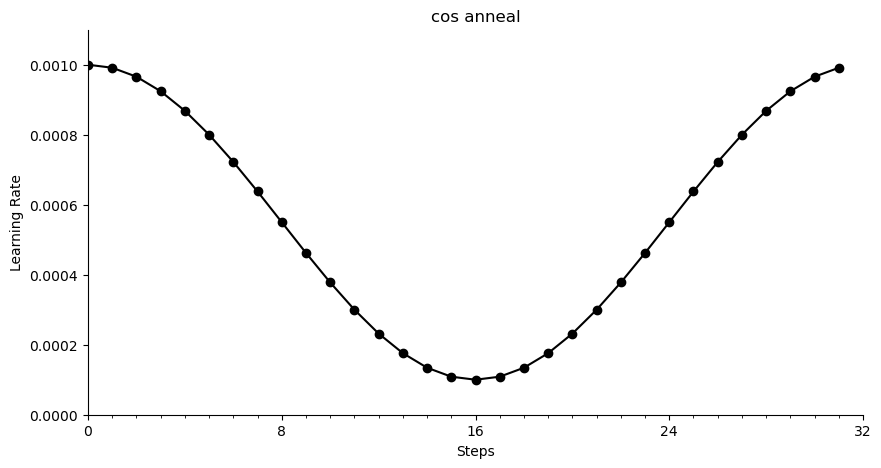

In [47]:
vis_lr_values(lr_values_cos, 'cos anneal')

In [51]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=4, T_mult=2, eta_min=1e-4)
lr_values_cos_warm = lr_step_values(scheduler)

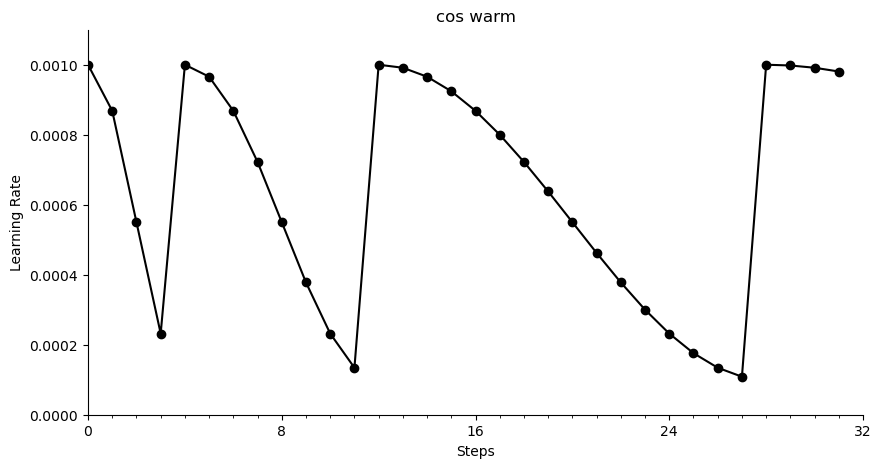

In [52]:
vis_lr_values(lr_values_cos_warm, 'cos warm')